# Day-64: Introduction to CNNs

In the last few days, we built Feedforward Neural Networks (FFNNs) and even used them for fraud detection on structured data.
But what happens when your data is not just numbers… but images, videos, or even spatial signals like ECG or sensor heatmaps?

That’s where CNNs come into play.

They are the backbone of modern computer vision — powering everything from autonomous cars, medical imaging, face recognition, to fraud detection through image-like representations of transactions (yes, you can visualize transaction sequences as 2D heatmaps).

## Topics Covered:
- Why CNNs fror Image Data
- Receptive Fields
- Spatial Hierachies
- Why We need Google Colab or CUDA Installation

## Why CNNs fror Image Data: Local Connectivity

- `Analogy`: The Assembly Line Inspector

  - An FFNN is like a single inspector who has to look at every tiny piece of the car assembly line all at once—he gets overwhelmed.

  - A CNN is like having thousands of small, specialized inspectors. Each inspector only looks at a tiny, local region of the car (e.g., just the front left tire).

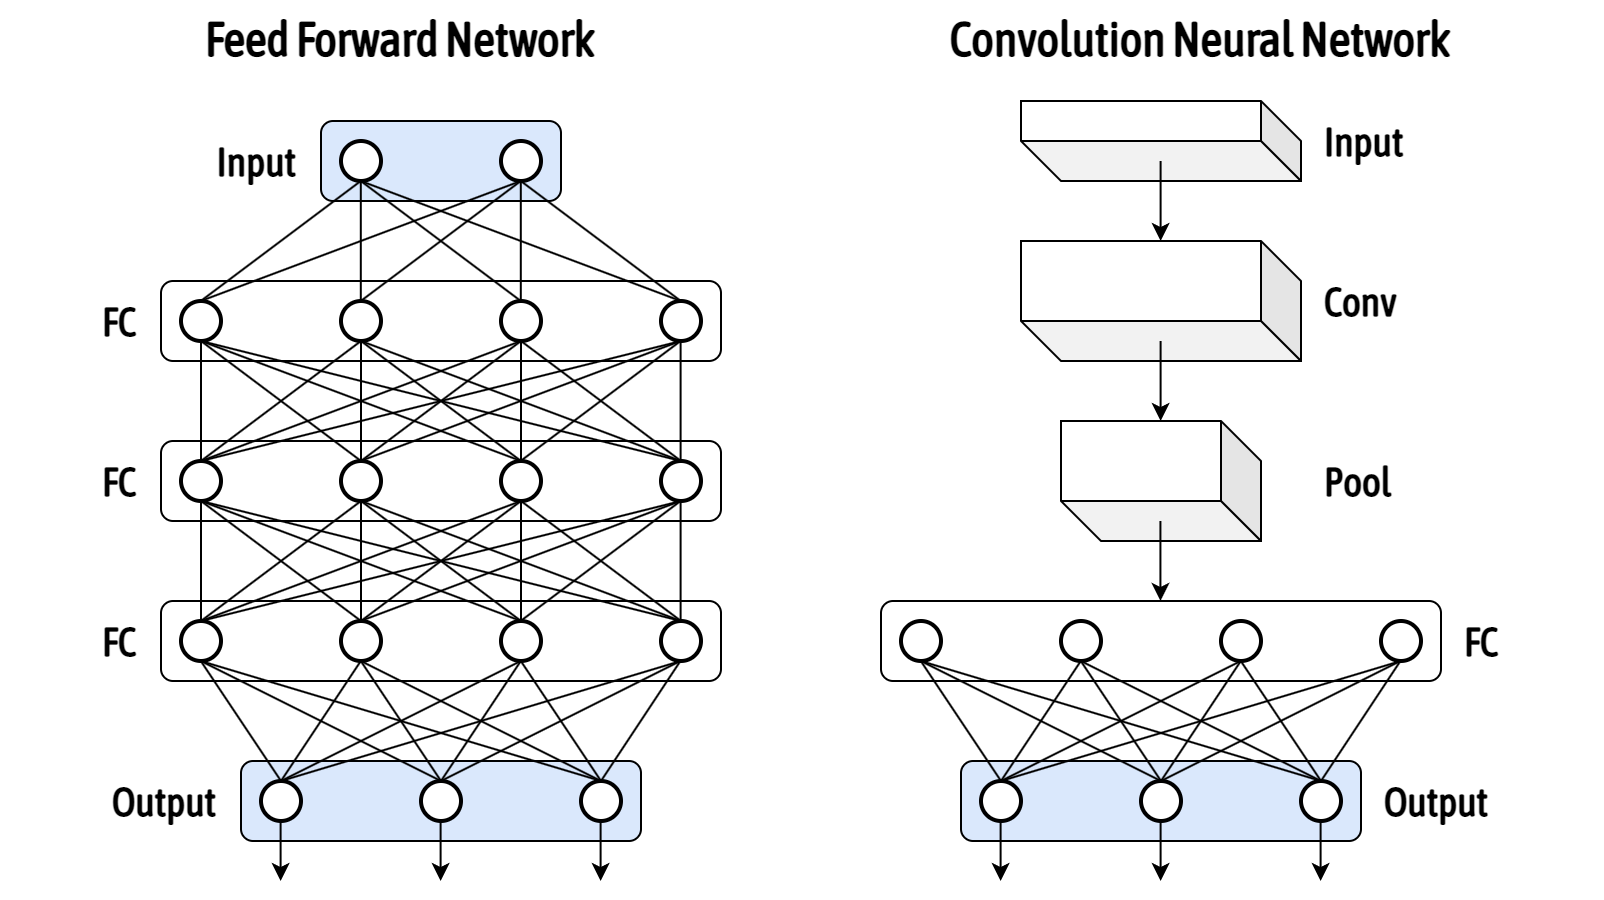

A Feedforward Neural Network treats each pixel independently — it flattens the image into one long vector.
That means it loses spatial relationships between neighboring pixels.

CNNs use Local Connectivity(Convolutions). Instead of connecting every input pixel to every neuron in the first hidden layer (like in an FFNN), each neuron in a CNN only connects to a small patch of the input image. This drastically reduces the number of parameters.

So instead of remembering every pixel, CNNs remember patterns — like shapes, corners, textures

## Receptive Fields: The Specialized Vision

- `Analogy`: The Magnifying Glass
    -  Receptive Field is simply the small, localized region of the input image that a particular neuron (or filter) is "looking" at.
        - Imagine taking a 3×3 or 5×5 magnifying glass and sliding it over an entire picture.
        - Each magnifying glass is focused on finding a very specific, local pattern, like a vertical edge, a horizontal line, or a specific color blob.
        - The CNN neurons in the first layer have small receptive fields, making them expert detectors of simple, local features.

## Spatial Hierarchies: Building Complexity

Deep CNNs learn in a step-by-step hierarchy, building complex recognition from simple parts.

CNNs build understanding layer by layer:

- $Layer-1$: Detects edges

- $Layer-2$: Detects corners or textures

- $Layer-3$: Detects object parts

- $Layer-4$: Detects the whole object

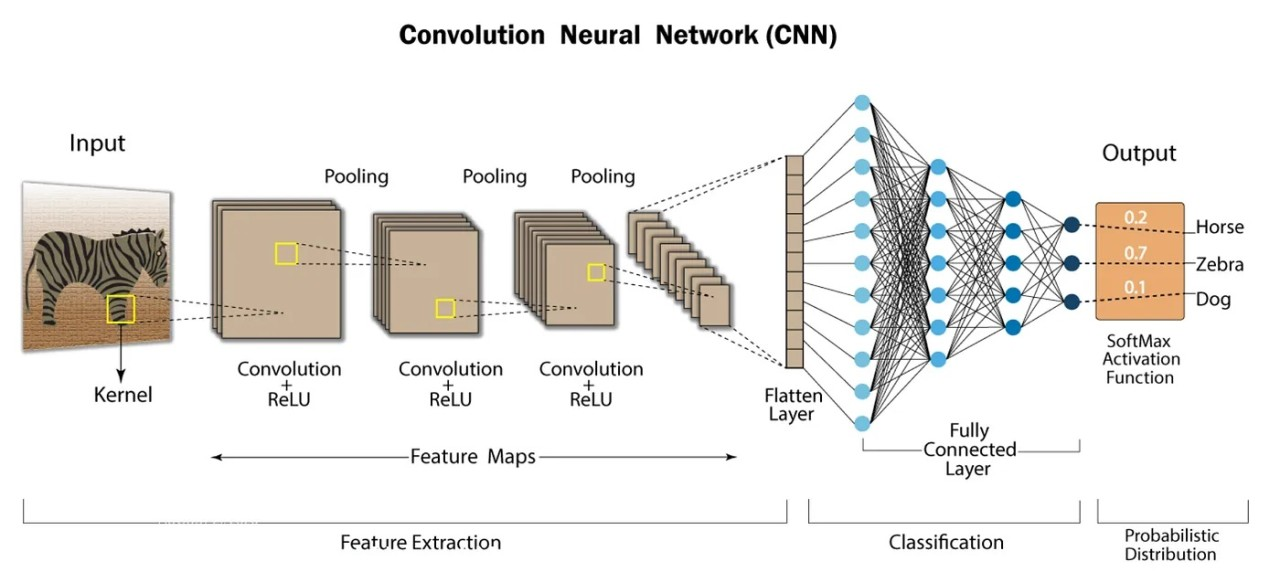

This hierarchical structure is the fundamental reason CNNs are so successful. They automatically learn the best features needed to solve the task, moving from simple building blocks to abstract, high-level concepts.

## The Need for GPU Acceleration (CUDA / Colab)

A CNN performs an enormous number of parallel, repeated calculations: the Convolution operation.

- CPU (Central Processing Unit): Would take hours or days to train a CNN on a CPU.

- GPU (Graphics Processing Unit): Has thousands of smaller, specialized cores, optimized for running the same calculation on massive amounts of data simultaneously (in parallel).

- CUDA: This is NVIDIA's parallel computing platform that allows TensorFlow and PyTorch to harness the GPU's power. We use Google Colab because it provides us with free, powerful GPUs running CUDA.

In [1]:
! pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train[0].shape)

# Preprocess data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Reshaped X_train
print(X_train[0].shape)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


(28, 28)
(28, 28, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9574 - loss: 0.1374 - val_accuracy: 0.9856 - val_loss: 0.0450
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0463 - val_accuracy: 0.9877 - val_loss: 0.0359
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9893 - val_loss: 0.0314
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0314
Test Accuracy: 0.9893


## Summary of Day 64

Today was a massive, conceptual pivot.
We learned:
- **Why FFNNs Fail Images**: They create a massive number of parameters and, critically, they destroy the spatial relationship between pixels through flattening.

- **Receptive Fields**: The small, localized patch of the image that a CNN neuron (filter) looks at, allowing it to find local patterns like edges.

- **Spatial Hierarchies**: The ability of deep CNNs to build complex object recognition by combining simple patterns from shallow layers into abstract concepts in deep layers.

This is the foundation for everything we do in computer vision!

## What's Next (Day 65)

Now that we know why CNNs are awesome, tomorrow we learn the actual mechanics!

Tomorrow, on Day 65, we will dive into the two core layers of a CNN: the Convolution Layer and the Pooling Layer! We will understand Kernels (Filters), how they use Strides and Padding, and how Max/Average Pooling shrinks the feature maps!